## Assignment -05

In this assignment students need to predict whether a person
makes over
50K per year or not from classic adult dataset using XGBoost.

In [42]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [270]:
df=pd.read_csv(r"../data/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [272]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [273]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


## The dataset contains `?` instead of Null values, lets replace them with NaN values

In [274]:
df.replace("?", pd.NA, inplace=True)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [276]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [277]:
## Seprate numerical and categorical features
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')
Categorical Columns: Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


## All of these 3 columns containing null values are part of categorical columns, lets impute them as well

In [278]:
for column in df.columns:
    if df[column].dtype == 'object':  
        most_common_value = df[column].mode()[0]
        df[column].fillna(most_common_value, inplace=True)
        
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Now we have imputed the NLL values and no Null Values are present

In [279]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [280]:
## Check for duplicated records
df.duplicated().sum()

24

## Drop duplicate rows

In [281]:
df.drop_duplicates(inplace=True)

In [282]:
## Check for duplicated records
df.duplicated().sum()

0

In [283]:
df[categorical_columns].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24509,10494,14970,5979,13187,27795,21775,29735,24698


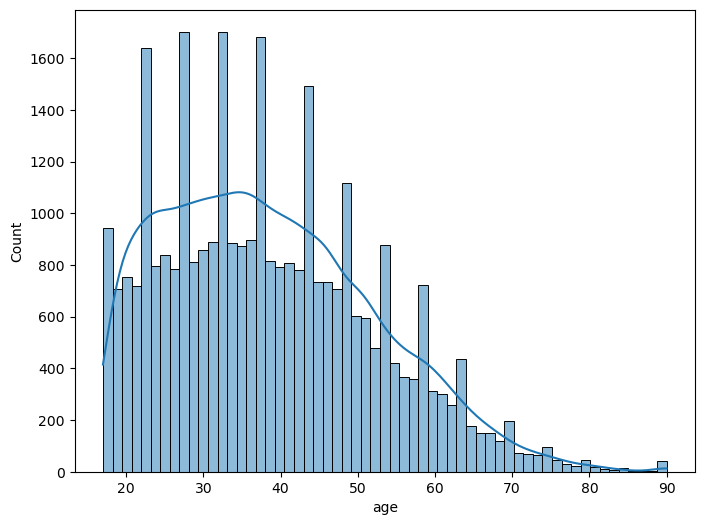

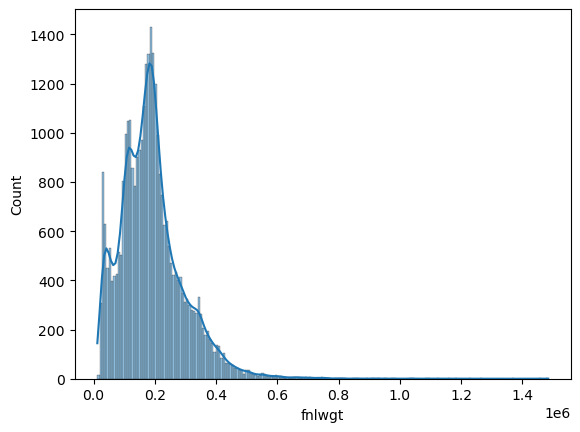

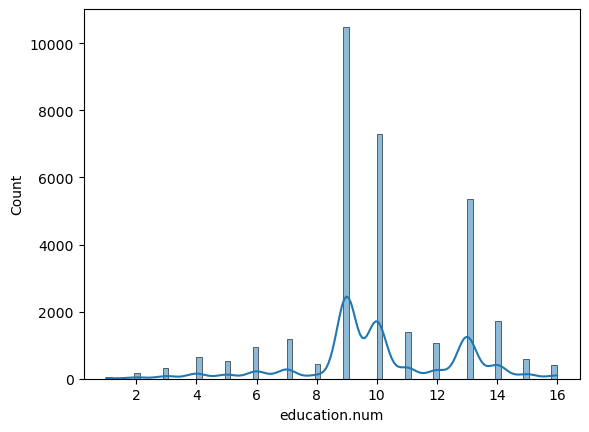

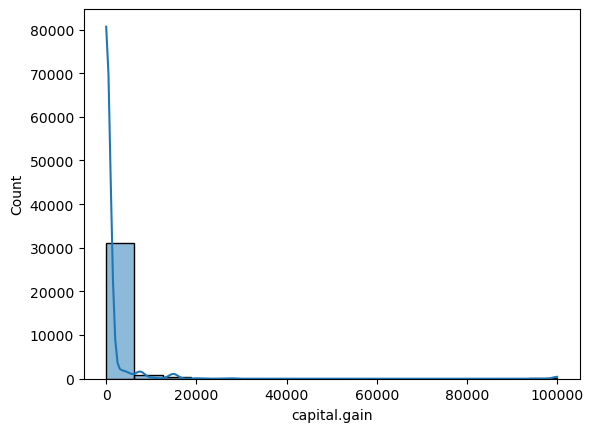

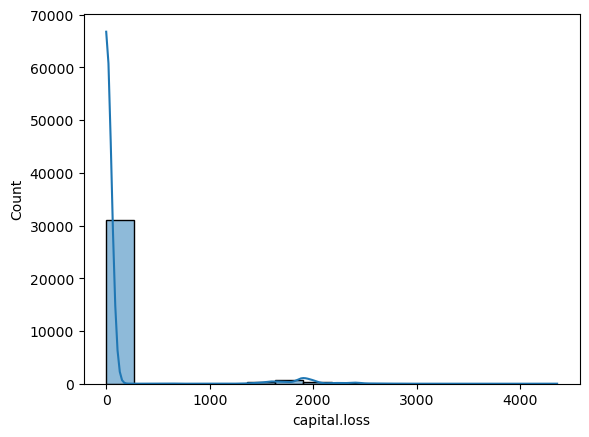

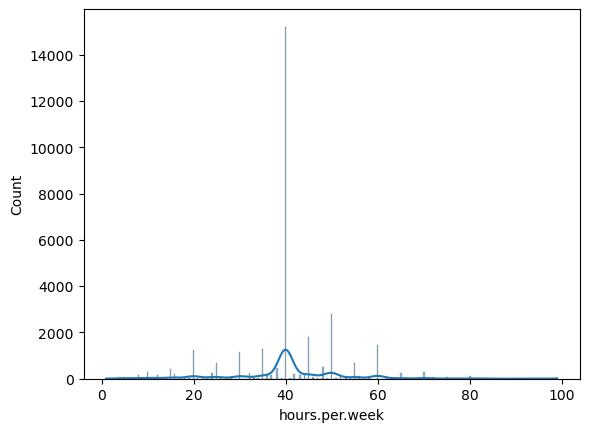

In [284]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

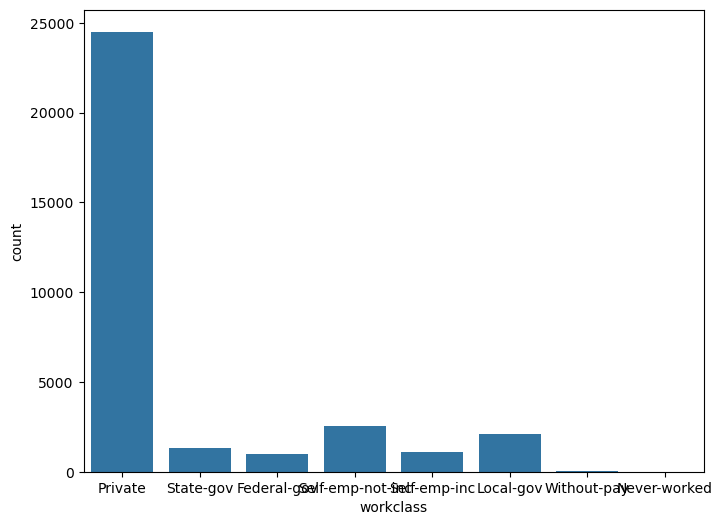

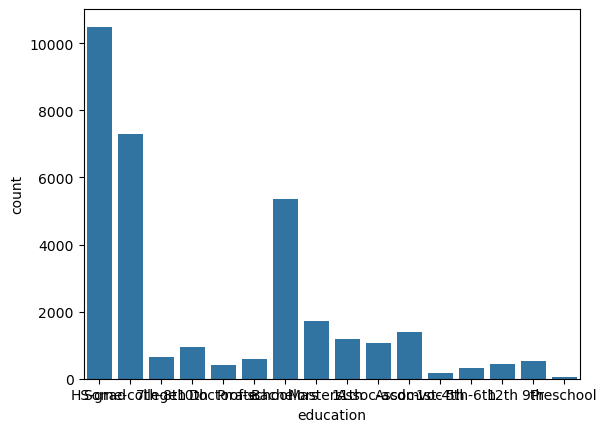

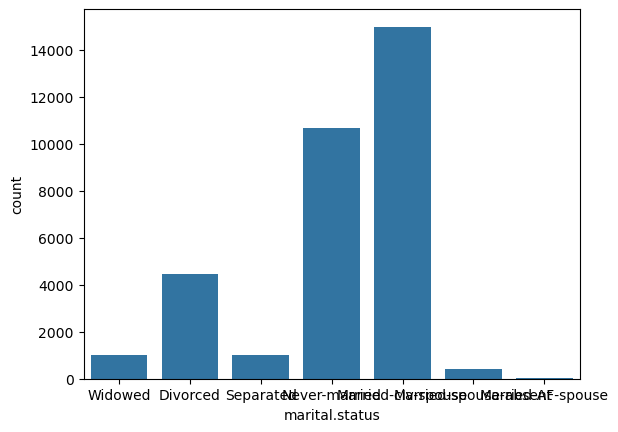

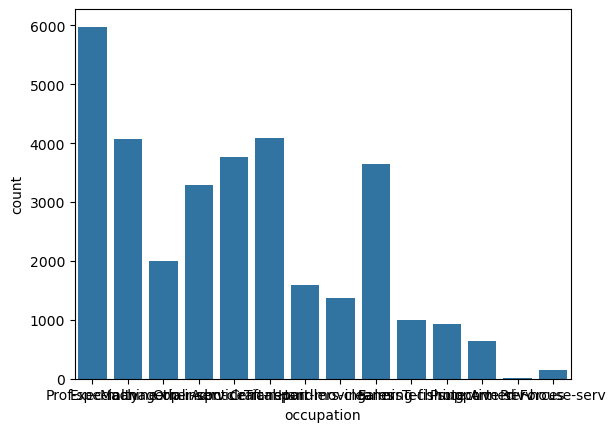

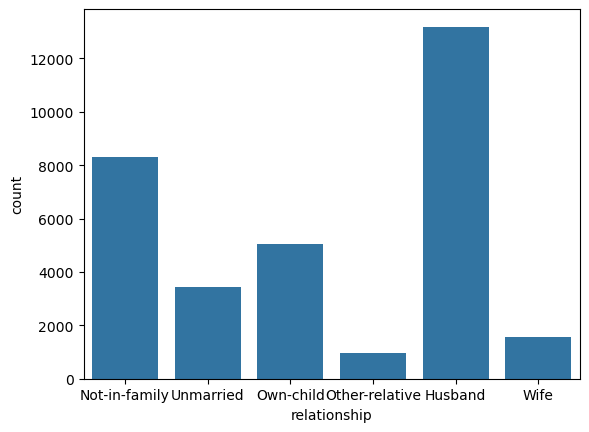

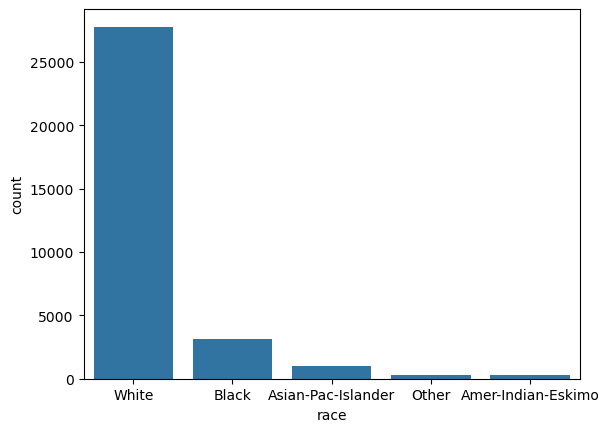

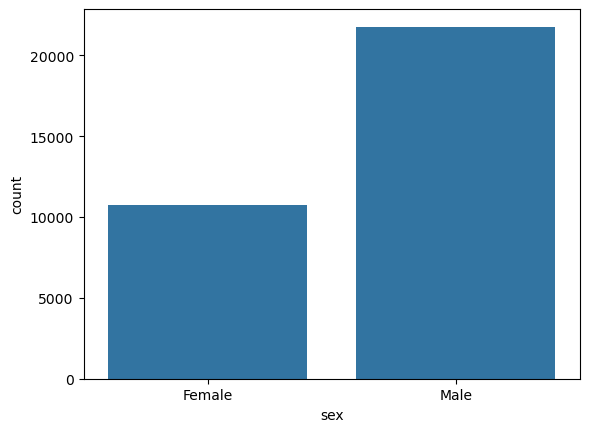

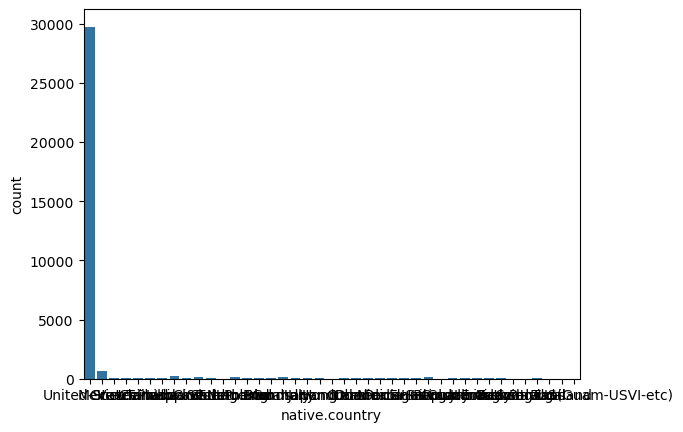

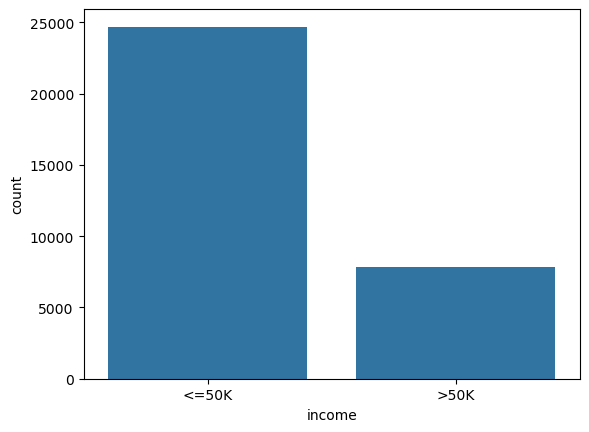

In [285]:
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.countplot(data=df,x=i)
    print('\n')
    plt.show()

In [286]:
# from sklearn.preprocessing import LabelEncoder
categorical_features=["education","workclass","marital.status","occupation","relationship","race","sex","native.country"]
numerical_features=["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"]
# for column in categorical_features:
#     l_encoder=LabelEncoder()
#     df[column]=l_encoder.fit_transform(df[column])

<Axes: >

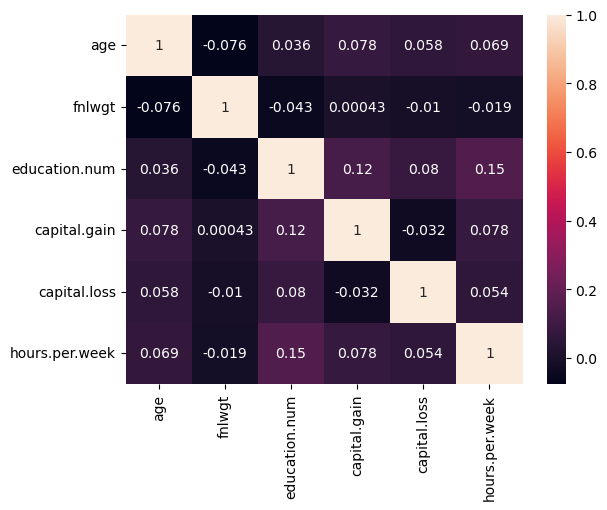

In [287]:
## Checking for colinearity
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [288]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import LabelEncoder # Label Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [289]:
# Dictionary to hold the encoders and transformers
# preprocessing_data = {}

# # Fit and transform the categorical columns
# for column in categorical_features:
#     l_encoder = LabelEncoder()
#     df[column] = l_encoder.fit_transform(df[column])
#     preprocessing_data[f'{column}_label_encoder'] = l_encoder

# # Fit and transform the numerical columns
# imputer = SimpleImputer(strategy='median')
# scaler = StandardScaler()

# df[numerical_features] = imputer.fit_transform(df[numerical_features])
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

# preprocessing_data['numerical_imputer'] = imputer
# preprocessing_data['numerical_scaler'] = scaler

# Save the preprocessing data
# joblib.dump(preprocessing_data, 'preprocessing_data.pkl')

In [290]:
## Independent and dependent features
X = df.drop(labels=['income'],axis=1)
Y = df[['income']]

In [291]:
# Define a function to convert income levels to 0 and 1
def convert_income_level(income_level):
    if income_level == '<=50K':
        return 0
    elif income_level == '>50K':
        return 1
    else:
        return None  # Handle other cases if necessary

# Apply the function to the income column
Y['income'] = Y['income'].map(convert_income_level)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11652\2294990103.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['income'] = Y['income'].map(convert_income_level)


In [308]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [309]:
print(X_train.shape, y_train.shape)

(22775, 14) (22775, 1)


In [310]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
9856,54,Self-emp-not-inc,108933,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States
13720,22,State-gov,121471,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
1940,51,Private,338620,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,60,United-States
3620,66,Federal-gov,38621,Assoc-voc,11,Widowed,Other-service,Unmarried,Black,Female,3273,0,40,United-States
11588,29,Private,393264,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States


In [311]:
categorical_features

['education',
 'workclass',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [312]:
# X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
# X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [313]:
preprocessing_data = {}
# Fit and transform the categorical columns
for column in categorical_features:
    l_encoder = LabelEncoder()
    X_train[column] = l_encoder.fit_transform(X_train[column])
    preprocessing_data[f'{column}_label_encoder'] = l_encoder

# Fit and transform the numerical columns
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

In [314]:
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

In [315]:
preprocessing_data['numerical_imputer'] = imputer
preprocessing_data['numerical_scaler'] = scaler

In [ ]:
# Save the preprocessing data
# joblib.dump(preprocessing_data, 'preprocessing_data.pkl')

In [316]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
9856,1.138794,5,-0.767973,11,-0.420270,2,2,0,4,1,-0.144605,-0.215842,-0.444681,38
13720,-1.212501,6,-0.649686,9,1.132182,4,9,1,4,0,-0.144605,-0.215842,-0.037180,38
1940,0.918360,3,1.398952,12,1.520295,2,3,0,4,1,1.807154,-0.215842,1.592821,38
3620,2.020530,0,-1.431314,8,0.355956,6,7,4,2,0,0.280589,-0.215842,-0.037180,38
11588,-0.698155,3,1.914478,9,1.132182,4,9,1,4,1,-0.144605,-0.215842,-0.037180,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21999,-1.285979,3,-0.054413,11,-0.420270,4,6,1,4,1,-0.144605,-0.215842,-0.037180,38
22787,-0.918589,3,0.632750,4,-2.748947,4,4,2,2,1,-0.144605,-0.215842,-0.037180,25
31152,2.681832,3,0.459471,15,-0.032157,2,13,0,4,1,-0.144605,-0.215842,-1.993182,38
5907,-0.698155,6,1.067112,9,1.132182,2,9,0,4,1,-0.144605,-0.215842,-1.259682,26


In [317]:
# Transform the categorical columns in the test data
for column in categorical_features:
    l_encoder = preprocessing_data[f'{column}_label_encoder']
    X_test[column] = X_test[column].map(lambda s: -1 if s not in l_encoder.classes_ else l_encoder.transform([s])[0])

imputer = preprocessing_data['numerical_imputer']
scaler = preprocessing_data['numerical_scaler']

X_test[numerical_features] = imputer.transform(X_test[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [318]:
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
9224,1.285750,3,-0.074300,11,-0.420270,2,5,0,4,1,-0.144605,-0.215842,-0.037180,38
20409,-0.624677,3,0.194066,11,-0.420270,2,3,2,4,0,-0.144605,-0.215842,-0.037180,38
30850,0.257058,1,0.007674,12,1.520295,4,9,4,4,0,-0.144605,-0.215842,-0.037180,38
5623,0.477492,3,-1.357868,12,1.520295,2,9,0,4,1,-0.144605,-0.215842,-0.363181,8
22349,0.036624,3,-0.842626,2,-0.808383,2,6,0,4,1,-0.144605,-0.215842,-0.037180,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8043,-0.551199,3,-1.536289,15,-0.032157,2,11,0,1,1,-0.144605,-0.215842,0.777820,35
13697,-0.698155,1,-0.019412,15,-0.032157,2,9,0,4,1,-0.144605,-0.215842,-0.037180,38
14636,2.755310,3,0.467414,11,-0.420270,0,0,1,4,0,-0.144605,-0.215842,-2.645183,38
29460,0.110102,0,-0.108207,11,-0.420270,2,0,5,4,0,-0.144605,-0.215842,-1.667182,38


In [319]:
X_test["workclass"].unique()

array([3, 1, 5, 4, 6, 0, 2, 7])

In [320]:
from xgboost.sklearn import XGBClassifier

In [321]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,   # would be boolean in sklearn
    'n_estimators': 100
}

In [322]:
xgb = XGBClassifier(**params).fit(X_train,y_train)

In [323]:
y_pred= xgb.predict(X_test)

In [326]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8694939561565252